#Handwritten digit recognition using SVM classifiers

In [13]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

We will use MLFlow to log our experiments using different kernels and tuning parameters.

In [14]:
import mlflow

In [15]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 640x480 with 0 Axes>

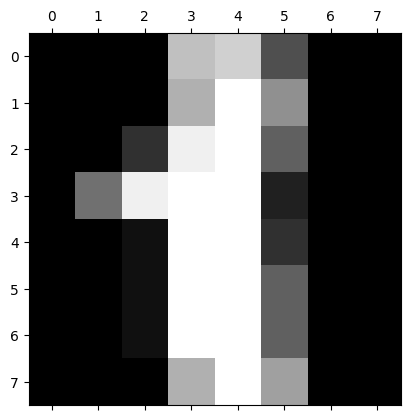

In [16]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])


In [17]:
mlflow.autolog()

2023/08/17 23:24:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [19]:
(X_train, X_test, y_train, y_test) = train_test_split(digits.data, digits.target, test_size = .2, random_state = 0)

In [18]:
classifier = svm.SVC(kernel = 'linear', C = 1.0)

Once we have split the digits into training and test data, we will train the classifier on the training data

In [20]:
classifier.fit(X_train, y_train)

2023/08/17 23:24:36 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'b1759e4e2bc04a50bb9ff2f050cad33a', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


SVC(kernel='linear')

In [21]:
y_predict = classifier.predict(X_test)

In [22]:
cm = confusion_matrix(y_test, y_predict)

In [23]:
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  1  1  0  0  0  0  0 37  0]
 [ 0  0  0  1  0  1  0  0  0 39]]


In [24]:
accuracy = accuracy_score(y_test, y_predict)

In [25]:
print(accuracy)

0.9777777777777777


We will now run the same data through the default SVM classifier.

In [29]:
classifier = svm.SVC(kernel = 'rbf', C = 1.0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


2023/08/17 23:29:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '78d0af8af48546a080c4399ed99d213f', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


In [30]:
print(cm)
print(accuracy)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]
0.9916666666666667


We will try with a polynomial kernel with a degree of 3.

In [33]:
classifer = svm.SVC(kernel = 'poly', C = 1.0, degree = 3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

2023/08/17 23:33:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd8f0ce3467824086ab75f498d9c60fe8', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]
0.9916666666666667
